In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [2]:
pos_flat = np.loadtxt('ex18_data.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)

In [3]:
class ExtremeNeighborCount:
    def __init__(self, color='C5', eps0=5, sigma=2**(-1/6), x_range=[-4,4], y_range=[-4,4]):
        self.xwidth = 1
        self.color = color
        self.bin_centers = range(2)
        self.eps0 = eps0
        self.sigma = sigma
        self.x_range = x_range
        self.y_range = y_range
        self.r_cut = 1.2*2**(1/6)*sigma
    
    def descriptor(self, pos):
        connectivity_matrix = (squareform(pdist(pos)) < self.r_cut).astype(int)
        np.fill_diagonal(connectivity_matrix, 0)
        neighbors = np.sum(connectivity_matrix, axis=1)
        Nlowest = np.min(neighbors)
        Nhighest = np.max(neighbors)
        return np.array([Nlowest, Nhighest])

    def potential(self, r):
        return 4*self.eps0*((self.sigma/r)**12 - (self.sigma/r)**6)
    
    def total_energy(self, pos):
        all_distances = pdist(pos)
        return np.sum(self.potential(all_distances))

    def plot_histogram(self, pos, ax):
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0,7])
        xticklabels = ['$N_{lowest}$','$N_{highest}$']
        ax.set_xticks(range(len(xticklabels)))
        ax.set_xticklabels(xticklabels)
        ax.set_title(self.__class__.__name__)
    
    def plot_2Dcluster(self, pos, ax):
        ax.set(xlabel=r'$x$', ylabel=r'$y$', xlim=self.x_range, ylim=self.y_range, aspect='equal')
        ax.grid(alpha=0.5)
        ax.scatter(pos[:,0], pos[:,1], edgecolors='k')
        ax.set_title(fr'$E = {self.total_energy(pos):.3f}$')

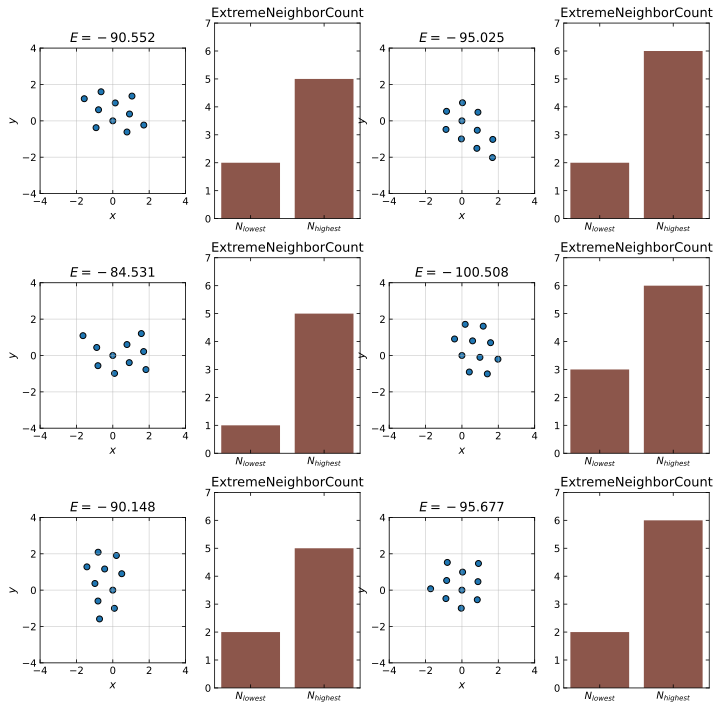

In [4]:
fig, axs = plt.subplots(3, 4, figsize=(12, 12))
enc = ExtremeNeighborCount()
for ax1, ax2 in zip(axs.flatten()[::2], axs.flatten()[1::2]):
    i = np.random.randint(len(positions))
    enc.plot_2Dcluster(positions[i], ax1)
    enc.plot_histogram(positions[i], ax2)

fig.savefig('ex19_fig1.png')

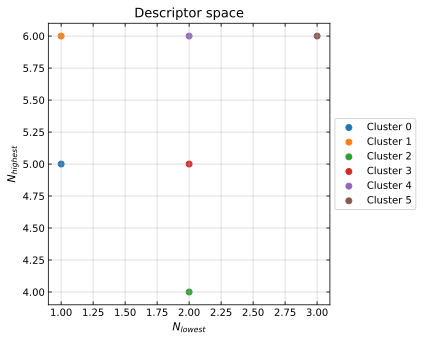

In [5]:
descriptors = np.array([enc.descriptor(pos) for pos in positions])
descriptors = np.unique(descriptors, axis=0)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set(xlabel=r'$N_{lowest}$', ylabel=r'$N_{highest}$', aspect='equal', title='Descriptor space')
ax.grid(alpha=0.5)
for i, des in enumerate(descriptors):
    ax.scatter(*des, label=f'Cluster {i}')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

fig.savefig('ex19_fig2.png')